In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, make_scorer, f1_score, matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV,  GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

## 64

In [2]:
X = pd.read_csv('ppi_emb_64.csv') # feature array
X.head()


,Protein_ID,Emb_1,Emb_2,Emb_3,Emb_4,Emb_5,Emb_6,Emb_7,Emb_8,Emb_9,...,Emb_55,Emb_56,Emb_57,Emb_58,Emb_59,Emb_60,Emb_61,Emb_62,Emb_63,Emb_64
0,35311,-0.022783,1.16824,0.471407,0.543798,-0.995765,-0.176736,-0.519212,-0.287490,0.222473,...,-0.100121,0.351349,0.366167,0.528196,0.007199,0.323710,-0.029984,-0.123899,0.252133,0.120400
1,32343,-0.074847,1.31464,0.731481,0.818193,-1.117750,-0.225526,-0.747791,-0.298603,0.407606,...,0.026027,0.434113,0.355148,0.262016,-0.084275,0.234673,0.068018,0.002392,-0.042244,0.022104
2,36184,-0.125082,1.28215,0.476468,0.746098,-1.152220,-0.227678,-0.622231,-0.258657,0.415299,...,-0.132131,0.223323,0.379335,0.261916,-0.006982,0.400656,-0.070333,-0.129033,0.097223,-0.105203
3,31453,0.042549,1.24465,0.642632,0.800949,-1.022410,-0.232490,-0.706641,-0.423225,0.442580,...,0.033022,-0.008945,0.327635,0.190701,0.087079,0.056520,-0.060676,-0.014538,0.279508,0.184814
4,35414,-0.101622,1.41675,0.595129,0.710680,-1.043770,-0.133462,-0.707400,-0.344476,0.335967,...,-0.004407,0.101191,0.373935,0.131526,-0.058632,0.100410,0.135683,-0.003284,0.106229,-0.041020


In [3]:
y = pd.read_csv('ppi_emb_64_out.csv') # target array
y.head()

,Essentiality
0,1
1,0
2,0
3,0
4,1


In [4]:
X.dtypes

Protein_ID      int64
Emb_1         float64
Emb_2         float64
Emb_3         float64
Emb_4         float64
               ...   
Emb_60        float64
Emb_61        float64
Emb_62        float64
Emb_63        float64
Emb_64        float64
Length: 65, dtype: object

In [5]:
y.dtypes

Essentiality    int64
dtype: object

In [6]:
sum(y['Essentiality'])/len(y['Essentiality'])

0.152945979044768

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


In [8]:
sum(y_train['Essentiality'])/len(y_train['Essentiality'])

0.15296679368535657

In [9]:
sum(y_test['Essentiality'])/len(y_test['Essentiality']) 

0.1528835690968444

[15:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9200217627856365
Balanced Accuracy Score: 0.7821810352512018
F1 Score: 0.6905263157894737
Matthew's Correlation Coefficient 0.6610031251443138


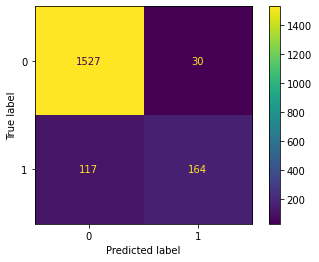

In [10]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, seed=42)

xgb_clf.fit(X_train, y_train)

predictions = xgb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))
print("Matthew's Correlation Coefficient", matthews_corrcoef(y_test, predictions))

c_matrix = confusion_matrix(y_test, predictions, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                              display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

## 1000

In [11]:
X = pd.read_csv('ppi_emb_64.csv') # feature array
X.head()

,Protein_ID,Emb_1,Emb_2,Emb_3,Emb_4,Emb_5,Emb_6,Emb_7,Emb_8,Emb_9,...,Emb_55,Emb_56,Emb_57,Emb_58,Emb_59,Emb_60,Emb_61,Emb_62,Emb_63,Emb_64
0,35311,-0.022783,1.16824,0.471407,0.543798,-0.995765,-0.176736,-0.519212,-0.287490,0.222473,...,-0.100121,0.351349,0.366167,0.528196,0.007199,0.323710,-0.029984,-0.123899,0.252133,0.120400
1,32343,-0.074847,1.31464,0.731481,0.818193,-1.117750,-0.225526,-0.747791,-0.298603,0.407606,...,0.026027,0.434113,0.355148,0.262016,-0.084275,0.234673,0.068018,0.002392,-0.042244,0.022104
2,36184,-0.125082,1.28215,0.476468,0.746098,-1.152220,-0.227678,-0.622231,-0.258657,0.415299,...,-0.132131,0.223323,0.379335,0.261916,-0.006982,0.400656,-0.070333,-0.129033,0.097223,-0.105203
3,31453,0.042549,1.24465,0.642632,0.800949,-1.022410,-0.232490,-0.706641,-0.423225,0.442580,...,0.033022,-0.008945,0.327635,0.190701,0.087079,0.056520,-0.060676,-0.014538,0.279508,0.184814
4,35414,-0.101622,1.41675,0.595129,0.710680,-1.043770,-0.133462,-0.707400,-0.344476,0.335967,...,-0.004407,0.101191,0.373935,0.131526,-0.058632,0.100410,0.135683,-0.003284,0.106229,-0.041020


In [12]:
y = pd.read_csv('ppi_graph_1011.emb_out.csv')
y.head()

,Essentiality
0,0
1,0
2,0
3,0
4,0


In [13]:
sum(y['Essentiality'])/len(y['Essentiality'])

0.152945979044768

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [15]:
sum(y_train['Essentiality'])/len(y_train['Essentiality'])

0.15296679368535657

In [16]:
sum(y_test['Essentiality'])/len(y_test['Essentiality']) 

0.1528835690968444

[15:54:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8367791077257889
Balanced Accuracy Score: 0.4982732099552703
F1 Score: 0.0196078431372549
Matthew's Correlation Coefficient -0.010729959721982629


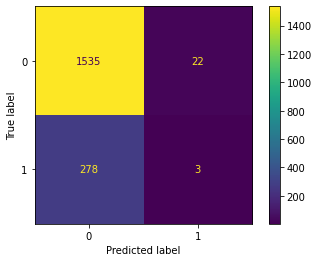

In [17]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, seed=42)

xgb_clf.fit(X_train, y_train)

predictions = xgb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))
print("Matthew's Correlation Coefficient", matthews_corrcoef(y_test, predictions))

c_matrix = confusion_matrix(y_test, predictions, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                              display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

## 128

In [18]:
X = pd.read_csv('ppi_graph_e2.emb.csv') # feature array
X.head()


,Protein_ID,Emb_1,Emb_2,Emb_3,Emb_4,Emb_5,Emb_6,Emb_7,Emb_8,Emb_9,...,Emb_55,Emb_56,Emb_57,Emb_58,Emb_59,Emb_60,Emb_61,Emb_62,Emb_63,Emb_64
0,35172,-0.219197,-0.064536,0.529702,-0.036840,-0.208907,-2.63320,-0.520615,0.247777,0.097288,...,0.003640,0.039411,-0.003954,0.182813,0.097850,0.000713,0.177308,-0.036164,0.037220,-0.231684
1,36219,-0.051611,-0.055717,0.506512,-0.049237,-0.378294,-3.78505,-0.505021,0.222950,-0.022712,...,-0.167189,0.179861,0.005906,0.148420,-0.014184,-0.123245,0.068333,0.069126,0.305638,0.002000
2,33529,-0.206878,0.017723,0.581162,-0.305732,-0.340831,-3.08255,-0.460425,0.335661,-0.135026,...,0.011725,0.070937,-0.131839,0.109878,-0.089183,0.223468,0.000416,-0.228223,-0.212249,-0.078489
3,33140,-0.651552,0.113270,0.958247,-0.173385,-0.410222,-3.32279,-0.570396,0.425498,-0.109159,...,0.117070,0.142106,-0.247275,-0.143655,-0.040301,0.100117,0.117124,0.000500,-0.338804,-0.161684
4,36478,-0.279379,0.280165,0.525679,0.019386,-0.571736,-3.29977,-0.686731,0.304353,0.136698,...,0.080335,0.183600,0.480127,0.069734,-0.035892,0.197071,0.294827,-0.374624,-0.098853,-0.211935


In [19]:
y = pd.read_csv('ppi_graph_e2.emb_out.csv')
y.head()

,Essentiality
0,0
1,0
2,0
3,1
4,0


In [20]:
sum(y['Essentiality'])/len(y['Essentiality'])

0.152945979044768

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [22]:
sum(y_train['Essentiality'])/len(y_train['Essentiality'])

0.15296679368535657

In [23]:
sum(y_test['Essentiality'])/len(y_test['Essentiality']) 

0.1528835690968444

[15:54:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9238302502720348
Balanced Accuracy Score: 0.7844289479037386
F1 Score: 0.7008547008547009
Matthew's Correlation Coefficient 0.6771843562680472


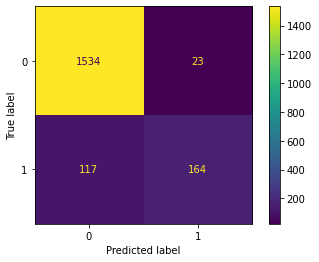

In [24]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, seed=42)

xgb_clf.fit(X_train, y_train)

predictions = xgb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))
print("Matthew's Correlation Coefficient", matthews_corrcoef(y_test, predictions))

c_matrix = confusion_matrix(y_test, predictions, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                              display_labels=xgb_clf.classes_)
disp.plot()
plt.show()

## Epoch=10

In [25]:
X = pd.read_csv('ppi_graph_e10.emb.csv')
X.drop(X.columns[[129]], axis=1, inplace=True) 
X.head()

,protein_id,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_119,emb_120,emb_121,emb_122,emb_123,emb_124,emb_125,emb_126,emb_127,emb_128
0,35453,-0.071900,0.323390,-0.341642,0.137416,0.418540,0.015601,-1.30523,0.477177,1.17112,...,0.142683,-0.153118,0.141608,-0.263766,-0.113139,0.043687,0.189464,0.141029,-0.018655,0.084978
1,34541,-0.000028,0.179229,-0.472758,0.011107,0.337032,0.046419,-1.39415,0.715963,1.09529,...,0.071234,0.072859,-0.135011,-0.060185,0.020260,0.005044,0.049998,-0.246181,-0.015463,-0.081796
2,34496,-0.300200,0.029528,-0.327213,0.173122,0.378983,-0.418844,-1.17801,0.524312,1.74226,...,-0.100104,0.056901,-0.369464,0.143987,-0.024520,0.304503,-0.038245,0.015238,0.031865,-0.074802
3,32783,0.084205,0.119421,-0.274436,0.066276,0.316684,0.241499,-1.27033,0.456444,1.33443,...,-0.265767,0.241059,-0.123604,0.071393,-0.150936,0.279875,-0.057841,-0.012771,-0.058049,-0.081486
4,33049,0.033426,-0.207836,-0.213357,0.264246,0.315720,0.041178,-1.39809,0.545583,1.05477,...,-0.062209,-0.008099,-0.255717,-0.046022,-0.086025,-0.010030,0.115172,0.110073,0.215150,0.027343


In [26]:
y = pd.read_csv('ppi_graph_e10.emb_out.csv')
y.head()

,Essentiality
0,0
1,0
2,1
3,0
4,1


In [27]:
sum(y['Essentiality'])/len(y['Essentiality'])

0.152945979044768

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


In [29]:
sum(y_train['Essentiality'])/len(y_train['Essentiality'])

0.15296679368535657

In [30]:
sum(y_test['Essentiality'])/len(y_test['Essentiality']) 

0.1528835690968444

[15:54:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9075081610446137
Balanced Accuracy Score: 0.7222987906755622
F1 Score: 0.6009389671361502
Matthew's Correlation Coefficient 0.5935428556400204


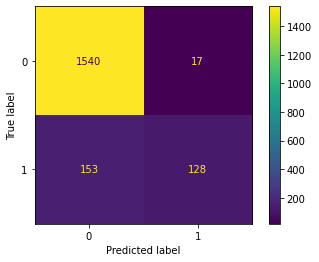

In [31]:
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, seed=42)

xgb_clf.fit(X_train, y_train)

predictions = xgb_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Balanced Accuracy Score:", balanced_accuracy_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))
print("Matthew's Correlation Coefficient", matthews_corrcoef(y_test, predictions))

c_matrix = confusion_matrix(y_test, predictions, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                              display_labels=xgb_clf.classes_)
disp.plot()
plt.show()